In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', y_train.shape, ' , t_test.shape = ', y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape =  (60000, 28, 28)  , x_test.shape =  (10000, 28, 28)
t_train.shape =  (60000,)  , t_test.shape =  (10000,)


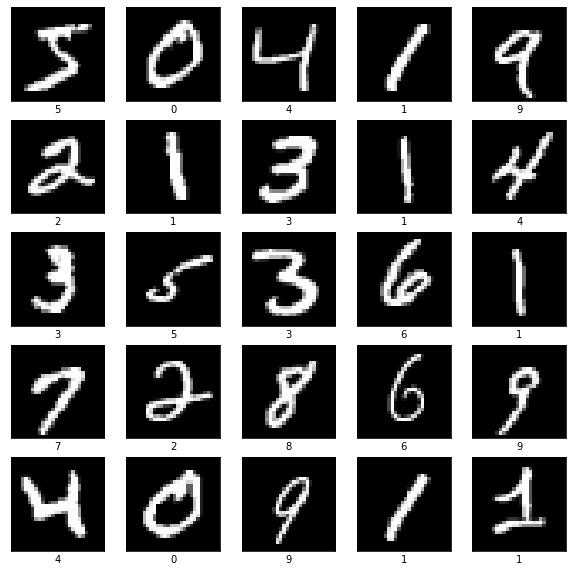

In [ ]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(y_train[index]))

plt.show()

In [ ]:
# sequential model construction

model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), kernel_size=3, filters=32, strides=(1,1), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(0.25))

model.add(Conv2D(kernel_size=3, filters=64, strides=(1,1), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(0.25))

model.add(Conv2D(kernel_size=3, filters=128, strides=(1,1), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [ ]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

학습전 특징맵 시각화

In [ ]:
for layer in model.layers:

    if 'conv' in layer.name:
        print(layer.name, layer.output.shape)

conv2d (None, 28, 28, 32)
conv2d_1 (None, 14, 14, 64)
conv2d_2 (None, 7, 7, 128)


In [ ]:
for idx in range(len(model.layers)):

    print('model.layers[%d] = %s, %s' % (idx, model.layers[idx].name, model.layers[idx].output.shape))

model.layers[0] = conv2d, (None, 28, 28, 32)
model.layers[1] = max_pooling2d, (None, 14, 14, 32)
model.layers[2] = dropout, (None, 14, 14, 32)
model.layers[3] = conv2d_1, (None, 14, 14, 64)
model.layers[4] = max_pooling2d_1, (None, 7, 7, 64)
model.layers[5] = dropout_1, (None, 7, 7, 64)
model.layers[6] = conv2d_2, (None, 7, 7, 128)
model.layers[7] = max_pooling2d_2, (None, 4, 4, 128)
model.layers[8] = dropout_2, (None, 4, 4, 128)
model.layers[9] = flatten, (None, 2048)
model.layers[10] = dense, (None, 10)


In [ ]:
from tensorflow.keras.models import Model

# 첫번째 층, 즉 0 번째 층만 떼어냄

partial_model = Model(inputs=model.inputs, outputs=model.layers[0].output) 

partial_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


8856


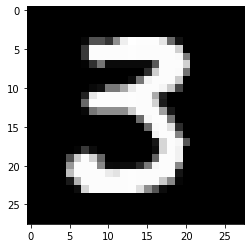

In [ ]:
random_idx = np.random.randint(0, len(x_test))

print(random_idx)

plt.imshow(x_test[random_idx].reshape(28,28), cmap='gray') 

In [ ]:
feature_map = partial_model.predict(x_test[random_idx].reshape(-1,28,28,1)) # 부분 모델로 테스트 집합을 예측

print(feature_map.shape)

fm = feature_map[0]  # 0번 이미지의 특징 맵을 시각화

print(fm.shape)

(1, 28, 28, 32)
(28, 28, 32)


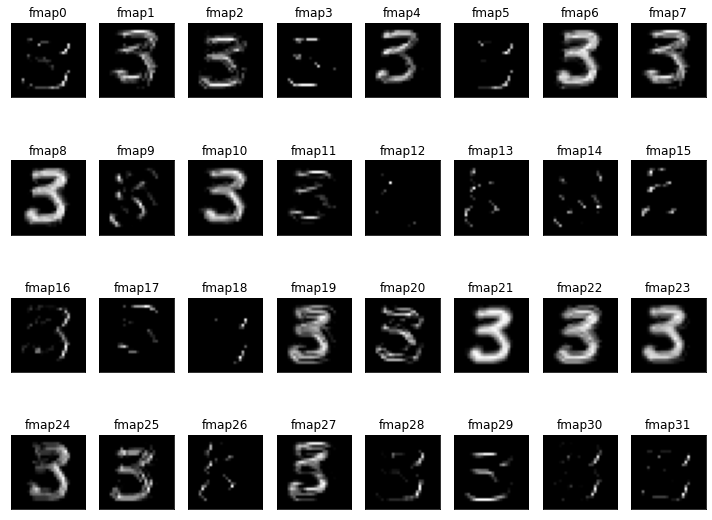

In [ ]:
plt.figure(figsize=(10, 8))

for i in range(32): # i번째 특징 맵

    plt.subplot(4,8,i+1)

    plt.imshow(fm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title("fmap"+str(i))
    
plt.tight_layout()
plt.show()

학습전 풀링맵 시각화

In [ ]:
# 첫번째 층, 즉 0 번째 층만 떼어냄

partial_model = Model(inputs=model.inputs, outputs=model.layers[1].output) 

partial_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pooling_map = partial_model.predict(x_test[random_idx].reshape(-1,28,28,1)) # 부분 모델로 테스트 집합을 예측

print(pooling_map.shape)

pm = pooling_map[0]  # 0번 이미지의 풀링 맵을 시각화

print(pm.shape)

(1, 14, 14, 32)
(14, 14, 32)


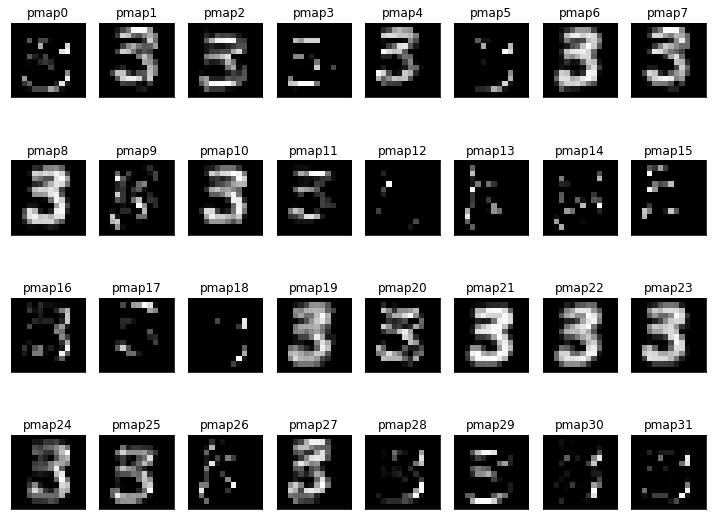

In [ ]:
plt.figure(figsize=(10, 8))

for i in range(32): # i번째 풀링 맵

    plt.subplot(4,8,i+1)

    plt.imshow(pm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title("pmap"+str(i))
    
plt.tight_layout()
plt.show()

모델 학습

In [ ]:
start_time = datetime.now()

hist = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time - start_time)

Epoch 1/50
938/938 [==============================] - 11s 9ms/step - loss: 0.2228 - accuracy: 0.9281 - val_loss: 0.0438 - val_accuracy: 0.9857
Epoch 2/50
938/938 [==============================] - 8s 8ms/step - loss: 0.0668 - accuracy: 0.9795 - val_loss: 0.0370 - val_accuracy: 0.9882
Epoch 3/50
938/938 [==============================] - 8s 8ms/step - loss: 0.0515 - accuracy: 0.9836 - val_loss: 0.0322 - val_accuracy: 0.9893
Epoch 4/50
938/938 [==============================] - 8s 8ms/step - loss: 0.0439 - accuracy: 0.9863 - val_loss: 0.0276 - val_accuracy: 0.9911
Epoch 5/50
938/938 [==============================] - 8s 8ms/step - loss: 0.0376 - accuracy: 0.9876 - val_loss: 0.0227 - val_accuracy: 0.9927
Epoch 6/50
938/938 [==============================] - 8s 8ms/step - loss: 0.0334 - accuracy: 0.9890 - val_loss: 0.0245 - val_accuracy: 0.9917
Epoch 7/50
938/938 [==============================] - 8s 8ms/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.0224 - val_accuracy: 0.9925
Epoch

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0225 - accuracy: 0.9940


[0.02249668352305889, 0.9940000176429749]

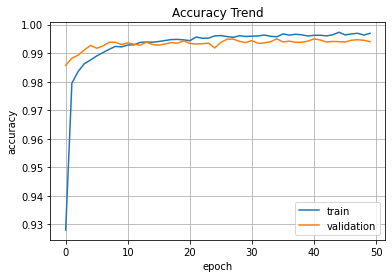

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

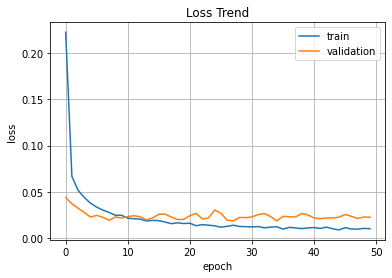

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

CNN 특징맵 시각화

In [ ]:
for idx in range(len(model.layers)):

    print('model.layers[%d] = %s, %s' % (idx, model.layers[idx].name, model.layers[idx].output.shape))

model.layers[0] = conv2d, (None, 28, 28, 32)
model.layers[1] = max_pooling2d, (None, 14, 14, 32)
model.layers[2] = dropout, (None, 14, 14, 32)
model.layers[3] = conv2d_1, (None, 14, 14, 64)
model.layers[4] = max_pooling2d_1, (None, 7, 7, 64)
model.layers[5] = dropout_1, (None, 7, 7, 64)
model.layers[6] = conv2d_2, (None, 7, 7, 128)
model.layers[7] = max_pooling2d_2, (None, 4, 4, 128)
model.layers[8] = dropout_2, (None, 4, 4, 128)
model.layers[9] = flatten, (None, 2048)
model.layers[10] = dense, (None, 10)


In [ ]:
from tensorflow.keras.models import Model

# 첫번째 층, 즉 0 번째 층만 떼어냄

partial_model=Model(inputs=model.inputs, outputs=model.layers[0].output) 

partial_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
feature_map = partial_model.predict(x_test[random_idx].reshape(-1,28,28,1)) # 부분 모델로 테스트 집합을 예측

print(feature_map.shape)

fm = feature_map[0]  # 0번 영상의 특징 맵을 시각화

print(fm.shape)

(1, 28, 28, 32)
(28, 28, 32)


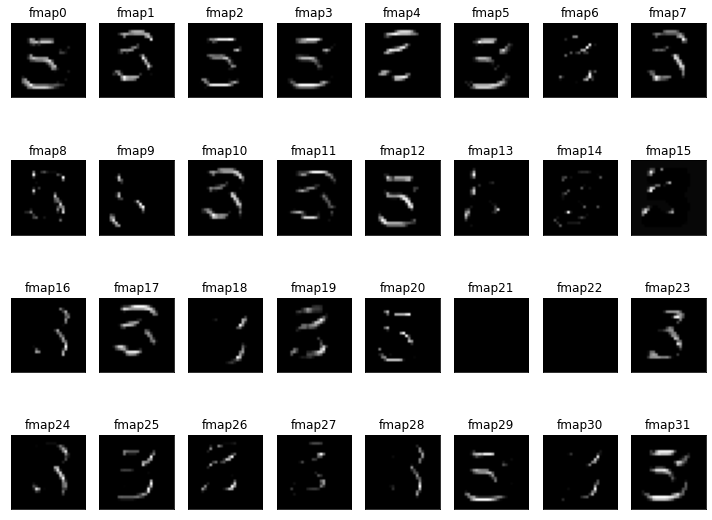

In [ ]:
plt.figure(figsize=(10, 8))

for i in range(32): # i번째 특징 맵

    plt.subplot(4,8,i+1)

    plt.imshow(fm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title("fmap"+str(i))
    
plt.tight_layout()
plt.show()

학습 후 풀링맵 시각화

In [ ]:
for idx in range(len(model.layers)):

    print('model.layers[%d] = %s, %s' % (idx, model.layers[idx].name, model.layers[idx].output.shape))

model.layers[0] = conv2d, (None, 28, 28, 32)
model.layers[1] = max_pooling2d, (None, 14, 14, 32)
model.layers[2] = dropout, (None, 14, 14, 32)
model.layers[3] = conv2d_1, (None, 14, 14, 64)
model.layers[4] = max_pooling2d_1, (None, 7, 7, 64)
model.layers[5] = dropout_1, (None, 7, 7, 64)
model.layers[6] = conv2d_2, (None, 7, 7, 128)
model.layers[7] = max_pooling2d_2, (None, 4, 4, 128)
model.layers[8] = dropout_2, (None, 4, 4, 128)
model.layers[9] = flatten, (None, 2048)
model.layers[10] = dense, (None, 10)


In [ ]:
# 첫번째 층, 즉 0 번째 층만 떼어냄

partial_model=Model(inputs=model.inputs, outputs=model.layers[1].output) 

partial_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pooling_map = partial_model.predict(x_test[random_idx].reshape(-1,28,28,1)) # 부분 모델로 테스트 집합을 예측

print(pooling_map.shape)

pm = pooling_map[0]  # 0번 영상의 풀링 맵을 시각화

print(pm.shape)

(1, 14, 14, 32)
(14, 14, 32)


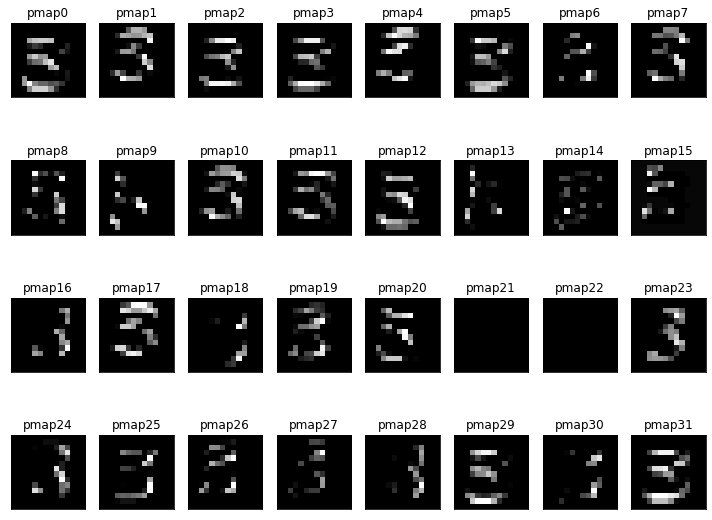

In [ ]:
plt.figure(figsize=(10, 8))

for i in range(32): # i번째 풀링 맵

    plt.subplot(4,8,i+1)

    plt.imshow(pm[:,:,i], cmap='gray')

    plt.xticks([]); plt.yticks([])
    plt.title("pmap"+str(i))
    
plt.tight_layout()
plt.show()